1) Import ไฟล์ vgsales เช็คข้อมูลเบื้องต้น

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


2) สุ่มอ่านข้อมูล 10 แถว หัว 5 แถว และท้าย 10 แถว

In [ ]:
#สุ่มอ่านข้อมูล 10 แถว
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4216,4218,Kong: The 8th Wonder of the World,GBA,2005.0,Action,Ubisoft,0.33,0.12,0.00,0.01,0.47
7756,7758,Petz Pony: Beauty Pageant,DS,2009.0,Simulation,Ubisoft,0.18,0.00,0.00,0.01,0.19
6514,6516,Disney Sing It: Pop Hits,PS3,2009.0,Misc,Disney Interactive Studios,0.17,0.05,0.00,0.03,0.26
11895,11897,Guilty Gear Xrd -Revelator-,PS4,2016.0,Fighting,PQube,0.02,0.00,0.05,0.00,0.07
14010,14012,Monster Force,GBA,2002.0,Shooter,Universal Interactive,0.03,0.01,0.00,0.00,0.04
125,126,Donkey Kong Country Returns,Wii,2010.0,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59
14050,14052,Ultimate Game Room,DS,2009.0,Misc,Majesco Entertainment,0.03,0.00,0.00,0.00,0.04
5587,5589,Golden Axe: Beast Rider,PS3,2008.0,Action,Sega,0.13,0.14,0.00,0.06,0.32
15304,15307,Hoppie,DS,2011.0,Platform,Jack of All Games,0.02,0.00,0.00,0.00,0.02
4052,4054,Backyard Baseball,PS2,2004.0,Sports,Atari,0.24,0.19,0.00,0.06,0.49


In [ ]:
# หัว 5 แถว และท้าย 10 แถว
frames =[df.head(5), df.tail(5)]
pd.concat(frames)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


3) หา Top 10 Platform ยอดฮิต พร้อมระบุจำนวน

In [ ]:
count_platform = df['Platform'].value_counts()[0:10]
count_platform.index.name = "Platform"
print("แสดง Top 10 Platform")
count_platform

แสดง Top 10 Platform


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Platform, dtype: int64

4) หา Bottom 10 Platform ยอดฮิต พร้อมระบุจำนวน

In [ ]:
count_platform = df['Platform'].value_counts().tail(10)
count_platform.index.name = "Platform"
print("แสดง Bottom 10 Platform")
count_platform

แสดง Bottom 10 Platform


Platform
GB      98
DC      52
GEN     27
NG      12
WS       6
SCD      6
3DO      3
TG16     2
PCFX     1
GG       1
Name: Platform, dtype: int64

5) หา Top 10 Platform ชนิดของเกมส์ยอดฮิต พร้อมระบุจำนวน

In [ ]:
# หาชนิดของเกมยอดอิต
topByGenre = df['Genre'].value_counts().head(10)
topByGenre.index.name = "Genre"
print("ชนิดของเกมยอดฮิต คือเกมประภท",topByGenre.index[0])
topByGenre

ชนิดของเกมยอดฮิต คือเกมประภท Action


Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: Genre, dtype: int64

In [ ]:
# หา top 10 platform ของเกมประเภท Action เนื่องจากเกม Action เป็นประเภทของเกมที่ฮิตที่สุด
topPlatfromOfAction = df[df['Genre'] == "Action"]['Platform'].value_counts().head(10)
topPlatfromOfAction.index.name = "Platform"
topPlatfromOfAction

Platform
PS3     380
PS2     348
DS      343
X360    324
Wii     238
PSP     222
3DS     182
GBA     167
PC      165
PS      157
Name: Platform, dtype: int64

6) หา Bottom 10 Platform ชนิดของเกมส์ยอดฮิต พร้อมระบุจำนวน

In [ ]:
BottomPlatfromOfAction = df[df['Genre'] == "Action"]['Platform'].value_counts().tail(10)
BottomPlatfromOfAction.index.name = "Platform"
BottomPlatfromOfAction

Platform
XOne    68
WiiU    63
2600    61
N64     38
NES     13
SNES    12
GB       6
DC       3
SAT      3
GEN      3
Name: Platform, dtype: int64

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


7) หารายละเอียดเกมส์ GTA V ภาคต่างๆ ทั้งหมด

In [ ]:
df[df['Name'].str.match('Grand Theft Auto')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
90,91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08


8) หาจำนวนเกมส์ที่มีชื่อซ้ำกันทั้งหมด

In [ ]:
game_name = df[['Name']]
duplicatedName = game_name[game_name.duplicated()].drop_duplicates()
print("จำนวนเกมที่มีชื่อซ้ำกันมีทั้งหมด {} เกม".format(len(duplicatedName)))
duplicatedName

จำนวนเกมที่มีชื่อซ้ำกันมีทั้งหมด 2775 เกม


,Name
23,Grand Theft Auto V
35,Call of Duty: Black Ops II
37,Call of Duty: Modern Warfare 3
40,Call of Duty: Black Ops
55,Call of Duty: Modern Warfare 2
...,...
16553,Bound By Flame
16569,Resident Evil 4 HD
16591,Myst IV: Revelation
16594,Men in Black II: Alien Escape


9) หาจำนวนเกมส์ที่มีชื่อและ Platform ซ้ำกันทั้งหมด

In [ ]:
platform_df = df[['Name', 'Platform']]
duplicatedNameAndPlatform = platform_df[platform_df.duplicated()].drop_duplicates()
print("จำนวนเกมส์ที่มีชื่อและ Platform ซ้ำกันมีทั้งหมด {} เกม".format(len(duplicatedNameAndPlatform)))
duplicatedNameAndPlatform

จำนวนเกมส์ที่มีชื่อและ Platform ซ้ำกันมีทั้งหมด 5 เกม


,Name,Platform
1530,Need for Speed: Most Wanted,X360
4145,Sonic the Hedgehog,PS3
11676,Need for Speed: Most Wanted,PC
14999,Wii de Asobu: Metroid Prime,Wii
16127,Madden NFL 13,PS3


10) จากข้อ 9 พิจารณาแถวที่ข้อมูลซ้ำแและลบแถวนั้น

In [ ]:
#หาแถวที่มีข้อมูลซ้ำกัน
df_2 = df
new_df = df_2.drop_duplicates(subset=["Name", "Platform"])
new_df
# new_df คือ dataframe ที่ได้ทำการตัดแถวที่มีชื่อและ  Platform ของเกมที่ซ้ำกันออกแล้ว

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


11) หารายได้ทั้งหมดเกมส์ FIFA 15

In [ ]:
df[df['Name'] == "FIFA 15"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
219,220,FIFA 15,PS3,2014.0,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
449,450,FIFA 15,X360,2014.0,Sports,Electronic Arts,0.78,2.02,0.00,0.30,3.11
760,762,FIFA 15,XOne,2014.0,Sports,Electronic Arts,0.60,1.41,0.00,0.14,2.15
2475,2477,FIFA 15,PSV,2014.0,Sports,Electronic Arts,0.13,0.48,0.04,0.19,0.84
2716,2718,FIFA 15,Wii,2014.0,Sports,Electronic Arts,0.24,0.46,0.00,0.06,0.76
4368,4370,FIFA 15,3DS,2014.0,Sports,Electronic Arts,0.09,0.33,0.00,0.03,0.45
5911,5913,FIFA 15,PC,2014.0,Sports,Electronic Arts,0.00,0.27,0.00,0.03,0.30


In [ ]:
print("รายได้ทั้งหมดของเกมส์ FIFA 15 เท่ากับ {} millons".format(round(df[df['Name'] == "FIFA 15"]['Global_Sales'].sum(),2)))

รายได้ทั้งหมดของเกมส์ FIFA 15 เท่ากับ 19.02 millons


12) หารายได้ทั้งหมดของเกมส์ GTA V ในญี่ปุ่น

In [ ]:
total_sale_in_japan  = df[df['Name'] == 'Grand Theft Auto V']
total_sale_in_japan[['Name','JP_Sales']]

,Name,JP_Sales
16,Grand Theft Auto V,0.97
23,Grand Theft Auto V,0.06
44,Grand Theft Auto V,0.36
197,Grand Theft Auto V,0.00
1896,Grand Theft Auto V,0.00


In [ ]:
print("รายได้ทั้งหมดของเกมส์ GTA V ในญี่ปุ่น เท่ากับ {} millons".format(round(total_sale_in_japan['JP_Sales'].sum(),2)))

รายได้ทั้งหมดของเกมส์ GTA V ในญี่ปุ่น เท่ากับ 1.39 millons


13) สร้าง DF ที่ให้ index เป็นรายชื่อของเกมส์ที่มีซ้ำ และ Column เป็นจำนวนที่มีซ้ำ ไม่นับที่เป็น Unique

In [ ]:
new_df = df[df.duplicated(subset =["Name"], keep=False)]["Name"].value_counts()
new_df.index.name = "Name"
new_df= new_df.to_frame(name = "Count")
new_df

,Count
Name,
Need for Speed: Most Wanted,12
FIFA 14,9
LEGO Marvel Super Heroes,9
Madden NFL 07,9
Ratatouille,9
...,...
Gauntlet Legends,2
Kuroko's Basketball: Miracle Game,2
The Legend of Heroes VII: The Trail of Blue,2


14) สร้าง DF ที่มี index เป็นชื่อบริษัท และเรียงลำดับตามรายได้รวมจากมากไปน้อย

In [ ]:
new_df = df.groupby("Publisher").sum().sort_values(by="Global_Sales", ascending=False)
new_df = new_df['Global_Sales'].to_frame(name="total_sales")
new_df

,total_sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Ongakukan,0.01
Commseed,0.01
Takuyo,0.01


15) จงสร้าง DF ที่บรรจุเกมส์ Series Call of duty ทั้งหมด

In [ ]:
series_name = df['Name'].str.lower()
call_of_duty = df[series_name.str.match("call of duty")]
call_of_duty

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
7949,7951,Call of Duty: World at War,PC,2008.0,Shooter,Activision,0.02,0.13,0.00,0.03,0.19
12408,12410,Call of Duty 2,PC,2005.0,Shooter,Activision,0.00,0.05,0.00,0.01,0.06
12639,12641,Call of Duty: The War Collection,X360,2010.0,Shooter,Activision,0.05,0.00,0.00,0.00,0.06
15598,15601,Call of Duty: Modern Warfare Trilogy,PS3,2016.0,Shooter,Activision,0.00,0.01,0.00,0.00,0.02


16) จงหาว่า Call of Duty ภาคใดใน PC มีรายสูงสุดในยุโรป 5 อันดับแรก

In [ ]:
call_of_duty[call_of_duty['Platform'] == 'PC'].sort_values(by="EU_Sales", ascending = False ).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1769,1771,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0.00,1.12,0.0,0.03,1.15
1037,1039,Call of Duty: Modern Warfare 3,PC,2011.0,Shooter,Activision,0.41,0.98,0.0,0.33,1.72
1126,1128,Call of Duty: Black Ops,PC,NaN,Shooter,Activision,0.58,0.81,0.0,0.24,1.63
2347,2349,Call of Duty: Modern Warfare 2,PC,2009.0,Shooter,Activision,0.01,0.79,0.0,0.09,0.89
1217,1219,Call of Duty: Black Ops II,PC,2012.0,Shooter,Activision,0.63,0.69,0.0,0.21,1.53


17) จงหาว่า Platform ใด มียอดขายรวมสูงสุดในยุโรป

In [ ]:
max_sales_eu = df.groupby("Platform")['EU_Sales'].sum().sort_values(ascending = False).head(1)
print("Platform ที่มียอดขายรวมสูงสุดใน Europe คือ {} มียอดเท่ากับ {} millions".format(max_sales_eu.index[0],round(max_sales_eu[0], 2)))

Platform ที่มียอดขายรวมสูงสุดใน Europe คือ PS3 มียอดเท่ากับ 343.71 millions


18) จงหาว่าเกมส์ประเภทใดมียอดขายเฉลี่ยสูงสุดในภูมิภาคอื่นๆรอบโลก

In [ ]:
max_sales_platform = df.groupby("Genre").sum().sort_values(by = ['Other_Sales'], ascending = False).head(1)
print("เกมประเภท {} มียอดขายสูงสุดในภูมิภาคอื่นๆ เป็นเงินเท่ากับ {} millions".format(max_sales_platform.index[0],round(max_sales_platform['Other_Sales'][0] )))

เกมประเภท Action มียอดขายสูงสุดในภูมิภาคอื่นๆ เป็นเงินเท่ากับ 187.0 millions


19) สร้าง Bar Plot โดยให้แกน X เป็น Platform และ Y เป็นยอดขายทั่วโลก

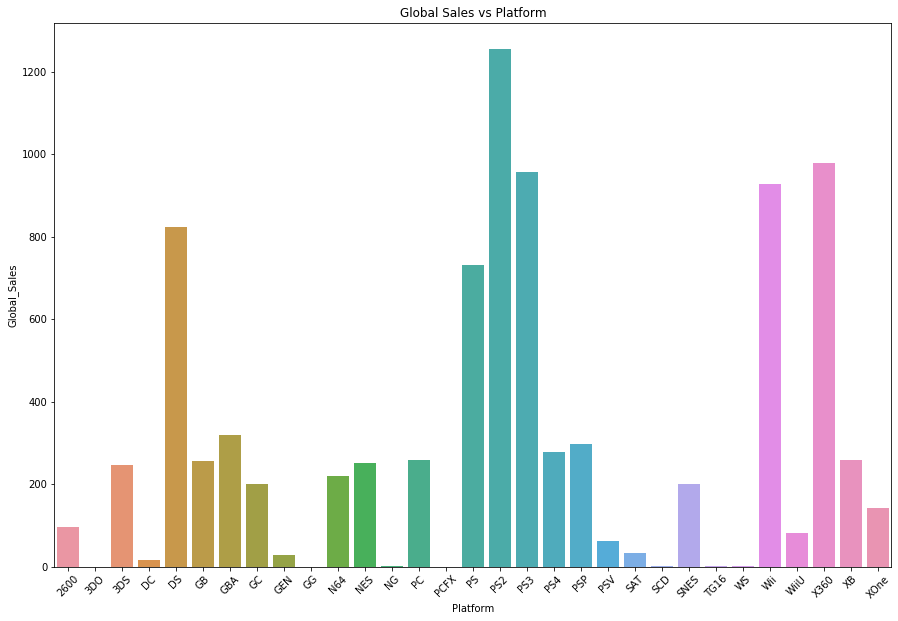

In [ ]:
plotform_global_sales = df.groupby("Platform").sum()
fig = plt.figure(figsize=[15, 10])
fig = sns.barplot(x=plotform_global_sales.index, 
                  y = "Global_Sales", 
                  data = plotform_global_sales,
                  )
plt.title("Global Sales vs Platform")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45)
plt.show()

20) สร้าง Pie Chart หาส่วนแบ่งทางการตลาดของ 5 บริษัทแรกที่มีรายได้มากที่สุด

In [ ]:
import plotly.express as px
top5Sales = df.groupby("Publisher").sum().sort_values(by="Global_Sales", ascending=False).head()
fig = px.pie(top5Sales,
             values='Global_Sales',
             names=top5Sales.index,
             hover_data =['Global_Sales'])
fig.show()

21) สร้าง Count Plot นับข้อมูลประเภทของเกมส์

Text(0.5, 1.0, 'Count Plot')

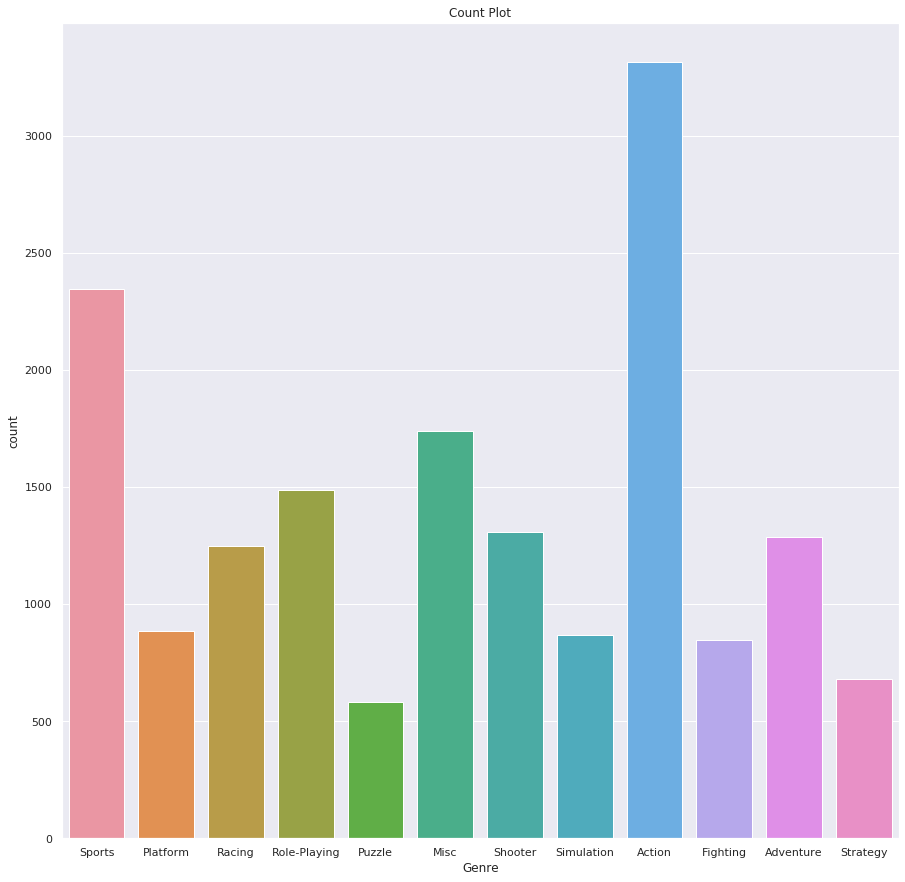

In [ ]:
fig = plt.figure(figsize=[15, 15])
fig = sns.set(style="darkgrid")
fig = sns.countplot(x="Genre", data=df)
plt.title("Count Plot")

22) สร้าง Bar plot Top 5 รายได้ทั่วโลกของ Call of Duty ภาคต่างๆใน Xbox

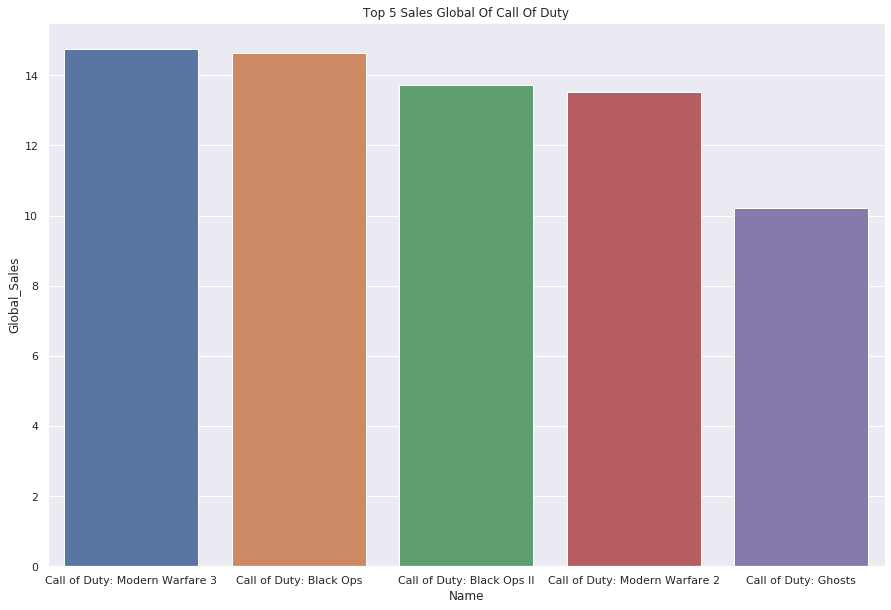

In [ ]:
top5_call_of_duty = call_of_duty[call_of_duty['Platform'] == "X360"].head()
fig = plt.figure(figsize=[15, 10])
fig = sns.barplot(x="Name", y="Global_Sales", data = top5_call_of_duty)
plt.title("Top 5 Sales Global Of Call Of Duty")
plt.show()

23) สร้าง Line Graph แสดงรายได้จาก North America จากปีแรกถึงปีสุดท้าย

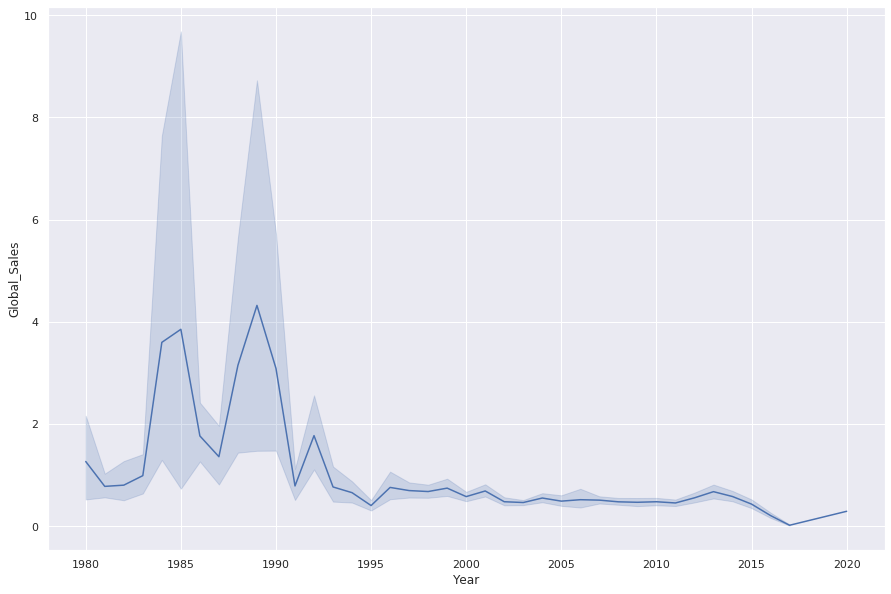

In [ ]:
# เนื่องจาก Year มีค่า Nan จึงทำการตัด row นั้นออก
new_df = df.dropna(subset=['Year'])
new_df = new_df.sort_values(by='Year')
fig = plt.figure(figsize=[15, 10])
fig = sns.lineplot(x="Year", y="Global_Sales", data=new_df, err_style="band" )

24) สร้าง Stripplot โดยให้แกน X เป็น Genre และ แกน Y เป็นรายได้ทั่วโลก

Text(0.5, 1.0, 'Stripplot shows Global_Sales Vs Genre')

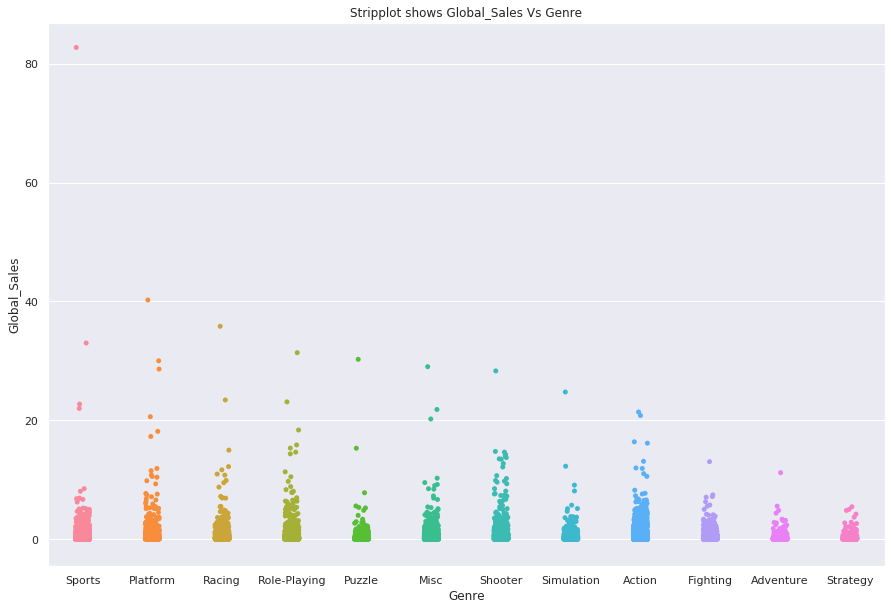

In [ ]:
fig = plt.figure(figsize=[15, 10])
fig = sns.stripplot(x="Genre", y="Global_Sales", data=df)
plt.title("Stripplot shows Global_Sales Vs Genre")

25) สร้าง Distribution Plot ของปี

Text(0.5, 1.0, 'Distribution Plot of Year')

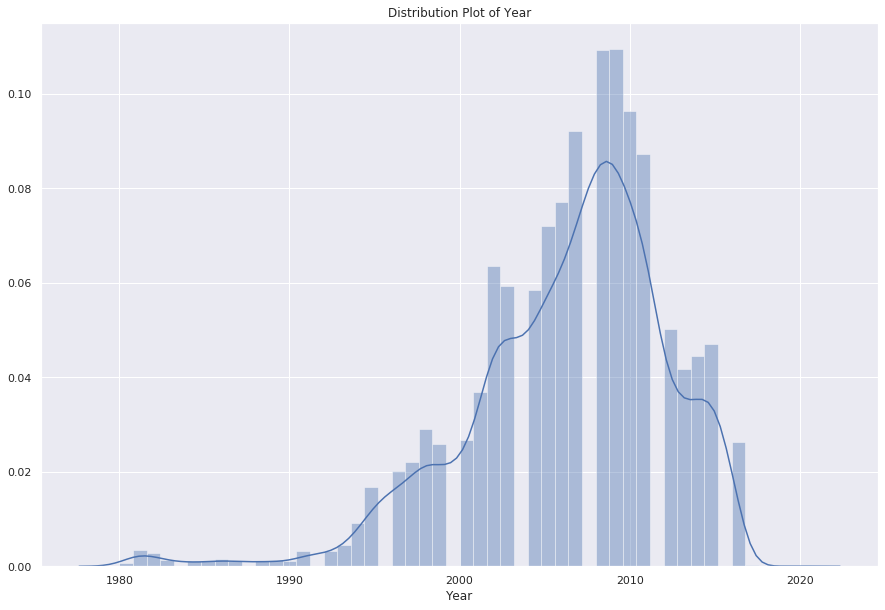

In [ ]:
fig = plt.figure(figsize=[15, 10])
fig = sns.distplot(df['Year'])
plt.title("Distribution Plot of Year")

26) สร้าง Bar Plot แสดงรายได้รวมในญี่ปุ่นรายปี

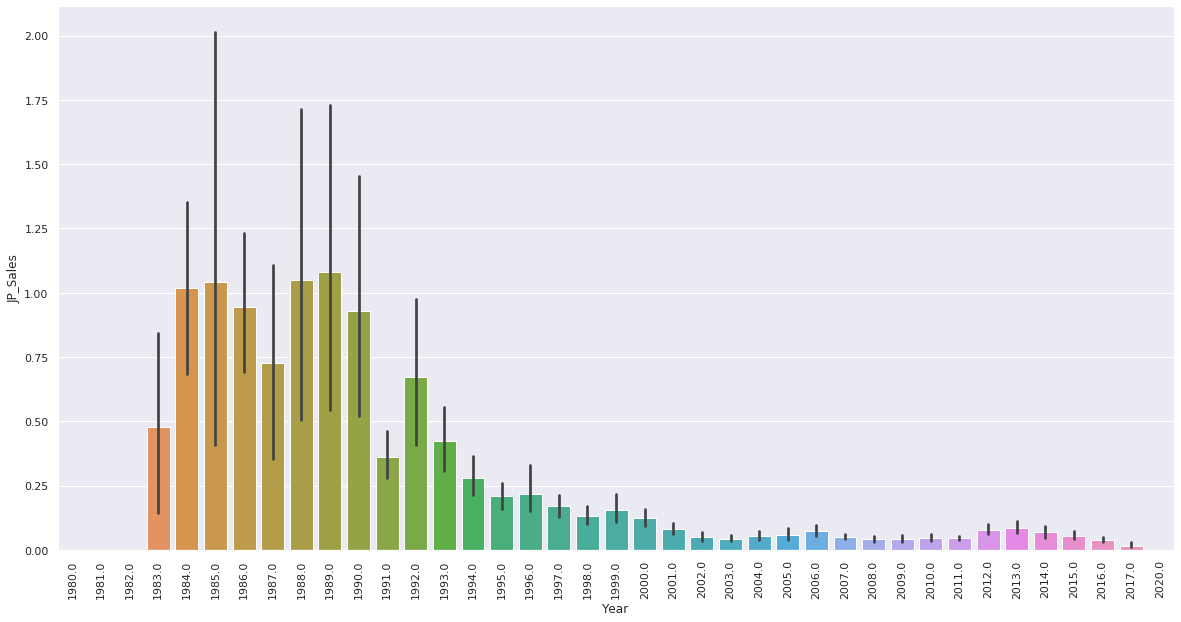

In [ ]:
fig = plt.figure(figsize=[20, 10])
fig = sns.barplot(x="Year", y="JP_Sales", data = df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title("")
plt.show()